In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = torch.zeros(1000000)
x = (torch.randn_like(a) * 0.1 ).clamp(-0.3, 0.3)

In [3]:
(counts, bins) = np.histogram(x,bins=100)

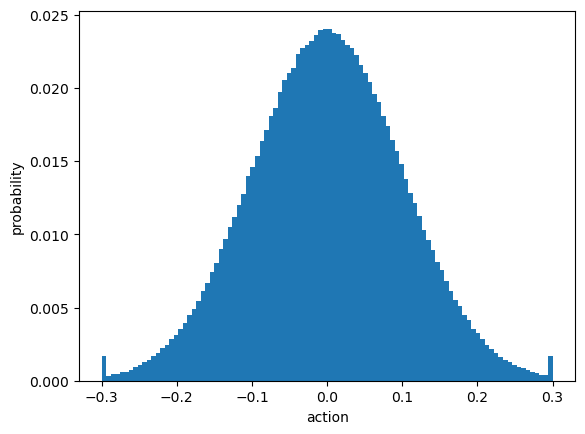

In [4]:
plt.xlabel('action')
plt.ylabel('probability')
plt.hist(bins[:-1],bins,weights=1/1000000*counts)
plt.savefig('clipped policy noise.pdf')

In [5]:
a2 = torch.zeros(1000000)
x2 = (torch.randn_like(a) * 0.2 ).clamp(-0.5, 0.5)
(counts2, bins2) = np.histogram(x2,bins=100)

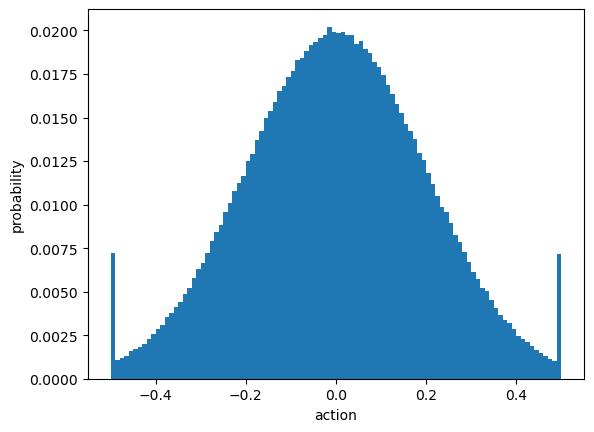

In [6]:
plt.xlabel('action')
plt.ylabel('probability')
plt.hist(bins2[:-1],bins2,weights=1/1000000*counts2)
plt.savefig('clipped policy noise 2.pdf')

In [7]:
class OUNoise():
    def __init__(self, shape, theta: float = 0.15, dt: float = 1e-2):
        self._shape = shape
        self._theta = theta
        self._dt = dt
        self.noise_prev = np.zeros(self._shape)
        self.reset()

    def __call__(self) -> np.ndarray:
        noise = (
            self.noise_prev
            + self._theta * ( - self.noise_prev) * self._dt
            + np.sqrt(self._dt) * np.random.normal(size=self._shape)
        )
        self.noise_prev = noise
        return noise

    def reset(self) -> None:
        self.noise_prev = np.zeros(self._shape)

In [29]:
# noise  = OUNoise((1))
# eps = 0.2
# n = 200
# num = 30
# runs = []
# def plot_UO(noise,eps,n,num,color):
#     for j in range(num):
#         noise.reset()
#         runs.append([])
#         for i in range(n):
#             x = noise()*eps
#             runs[j].append(x)


#     fig1 = plt.figure()
#     ax1 = fig1.add_subplot(111)
#     for k in range(num):
#         plt.plot(runs[k])


#     colormap = color
#     colors = [colormap(i) for i in np.linspace(0, 1,len(ax1.lines))]
#     for i,j in enumerate(ax1.lines):
#         j.set_color(colors[i])
#     plt.title("UO noise - eps = "+str(eps))
#     # plt.savefig('noise_UO.png')
#     plt.show()

# plot_UO(noise,0.1,n,60,plt.cm.winter)

# plot_UO(noise,0.2,n,num,plt.cm.summer)

In [30]:

def plot_UO(noise = OUNoise((2)),eps= 0.2,n= 200,num= 30,color = plt.cm.winter):
    runs = []
    for j in range(num):
        noise.reset()
        x1 = []
        x2 = []
        for i in range(n):
            x = noise()*eps
            x1.append(x[0])
            x2.append(x[1])
        runs.append([x1,x2])


    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    for k in range(num):
        plt.plot(np.array(runs)[k,0],np.array(runs)[k,1])


    colormap = color
    colors = [colormap(i) for i in np.linspace(0, 1,len(ax1.lines))]
    for i,j in enumerate(ax1.lines):
        j.set_color(colors[i])
    plt.title("UO noise - eps = "+str(eps))
    # plt.savefig('noise_UO.png')
    plt.show()


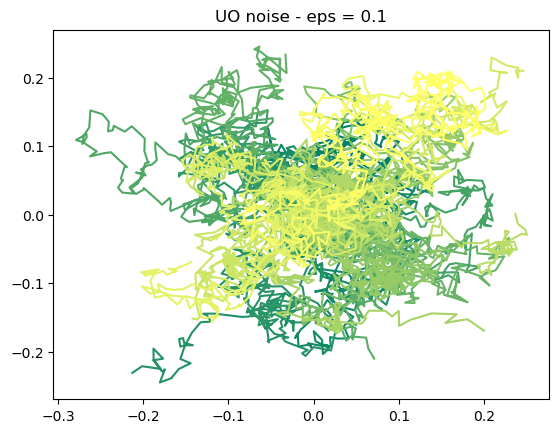

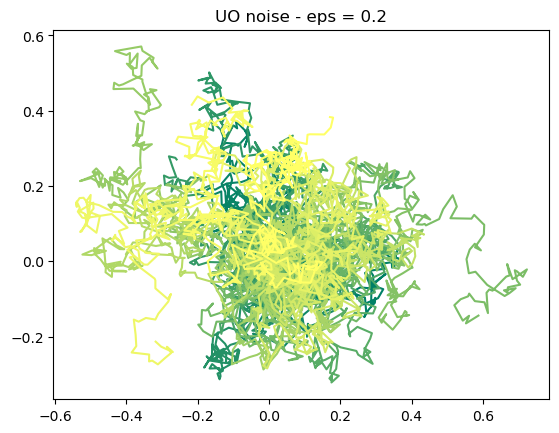

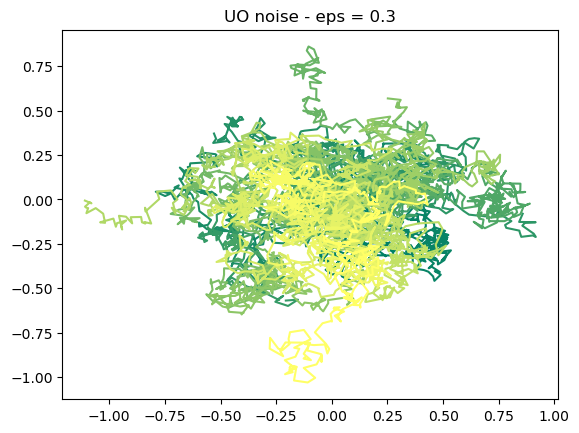

In [37]:
plot_UO(eps=0.1,color=plt.cm.summer)
plot_UO(eps=0.2,color=plt.cm.summer)
plot_UO(eps=0.3,color=plt.cm.summer)

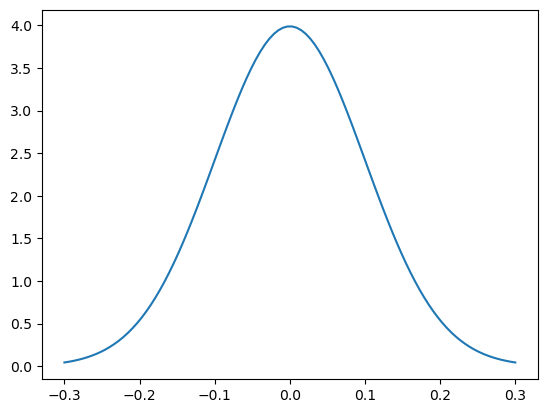

In [13]:
import scipy.stats as stats
import math
import numpy as np

mu = 0
variance = 0
sigma = 0.1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()